In [1]:
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

In [2]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('akarsh.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

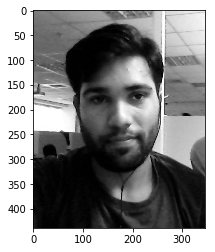

In [4]:
plt.imshow(gray_img, cmap='gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [5]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [6]:
#let's detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

#print the number of faces found 
print('Faces found: ', len(faces))


Faces found:  1


In [7]:
#go over list of faces and draw them as rectangles on original colored img 
for (x, y, w, h) in faces:     
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

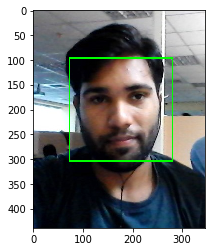

In [8]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

In [9]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy

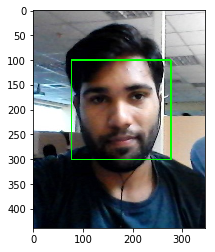

In [10]:
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')  
 
#load test image 
test2 = cv2.imread('akarsh.jpg') 
 
#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

In [11]:
#load test image 
test2 = cv2.imread('test4.jpg')

#Resizing the image
scale_percent = 10 # percent of original size
width = int(test2.shape[1] * scale_percent / 100)
height = int(test2.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
test2 = cv2.resize(test2, dim, interpolation = cv2.INTER_AREA) 

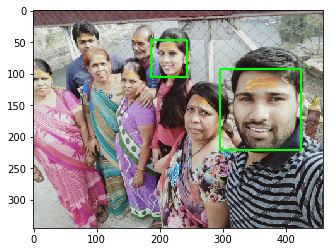

In [12]:
#call our function to detect faces 
faces_detected_img = detect_faces(lbp_face_cascade, test2,scaleFactor = 1.3)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

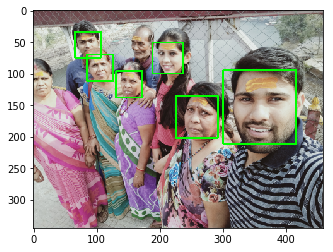

In [13]:
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2,scaleFactor = 1.3)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

In [14]:
#------------LBP----------- 
#note time before detection 
t1 = time.time() 
 
#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test2)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference
print(dt2)

0.02692413330078125


In [15]:
#------------HAAR----------- 
#note time before detection 
t1 = time.time()  
 
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test2)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 
#print the time difference
print(dt1)

0.11771106719970703


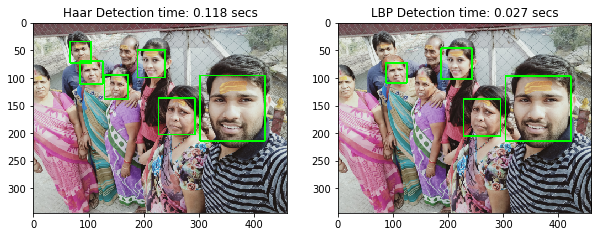

In [16]:
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
 
#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  
 
#show images 
#plt.imshow(faces_detected_img)

# so it is found out that haar is slow but more accurate where as lbp is faster but little less accurate. there is a trade of between time and accuracy.